# Logistic regression for multi-class classification

## import libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [38]:
directory_data  = '/Users/lyuwan-u/Desktop/2021-2/assignment-machine-learning-project/assignment05'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [39]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [40]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [41]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')


*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [42]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [43]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

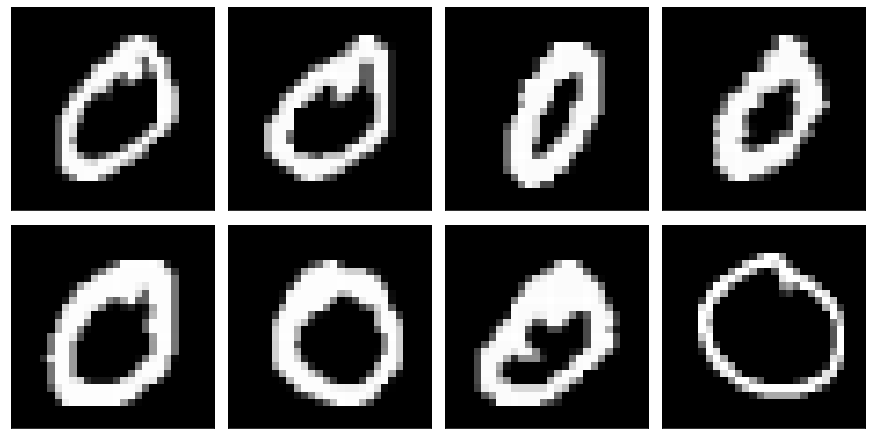

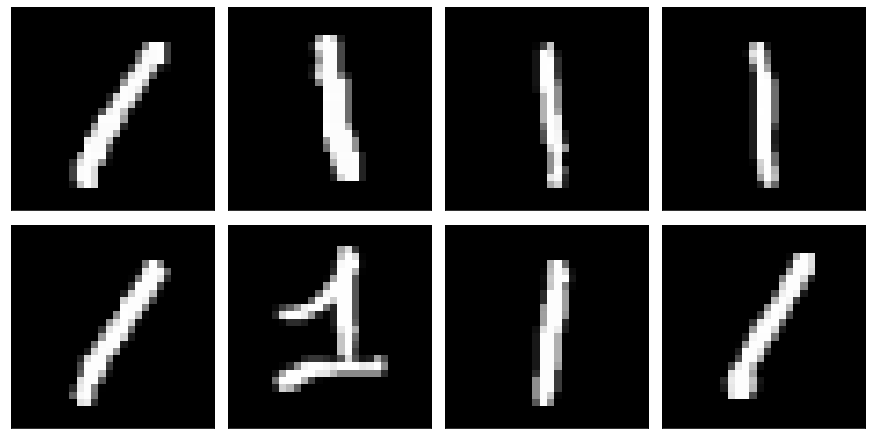

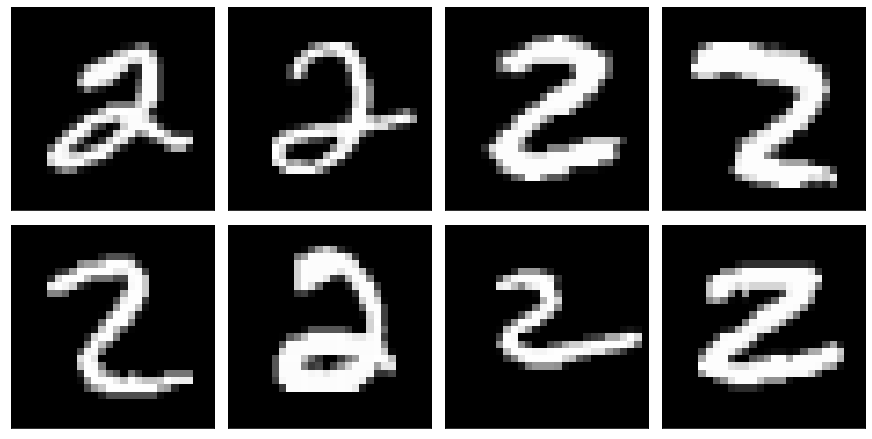

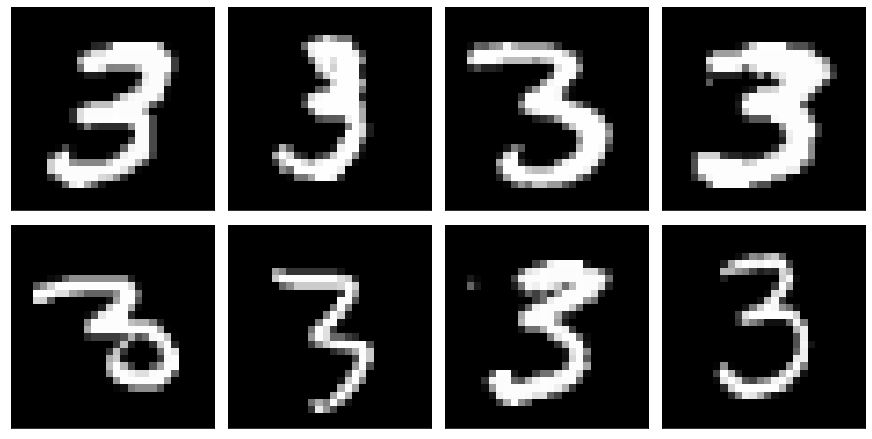

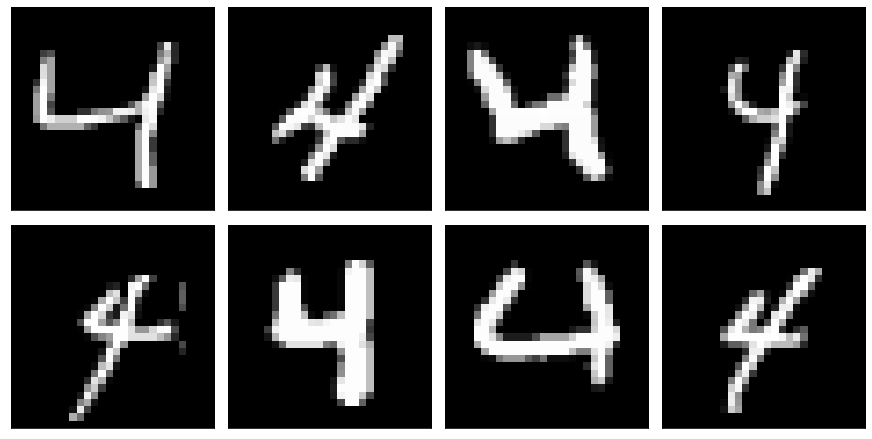

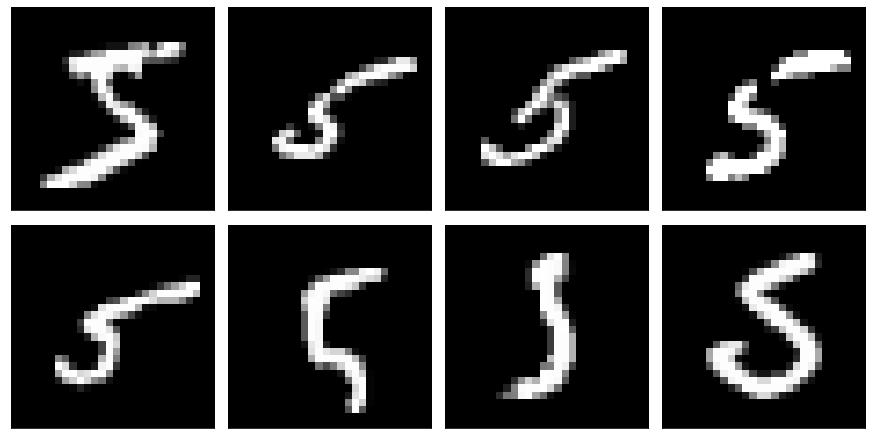

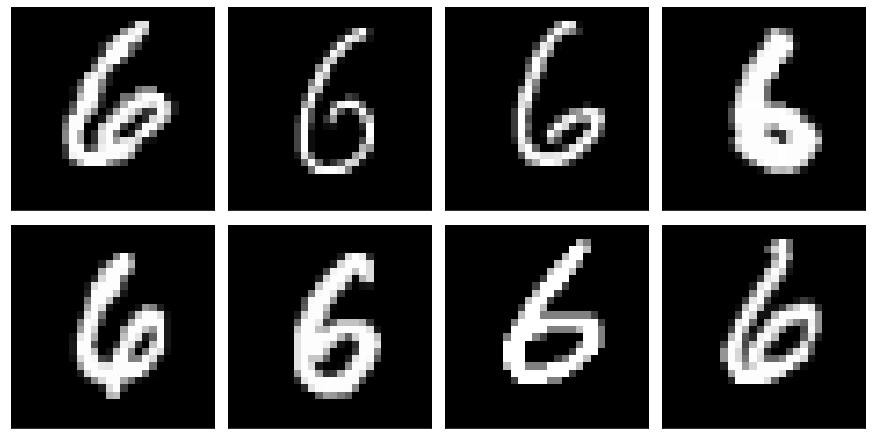

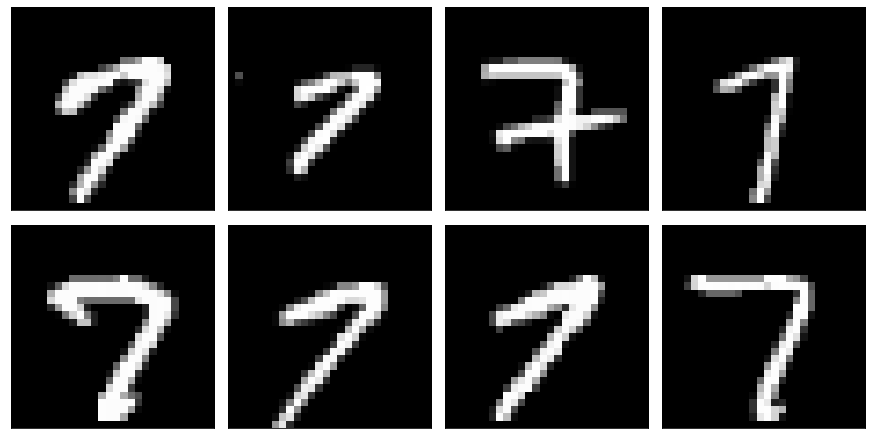

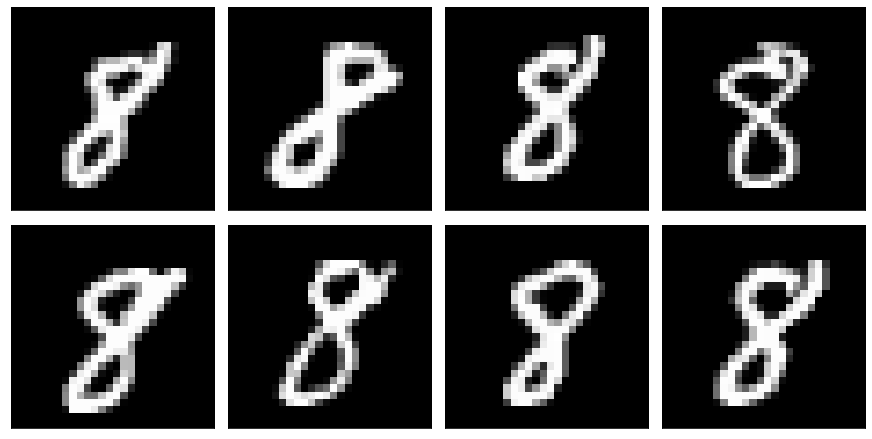

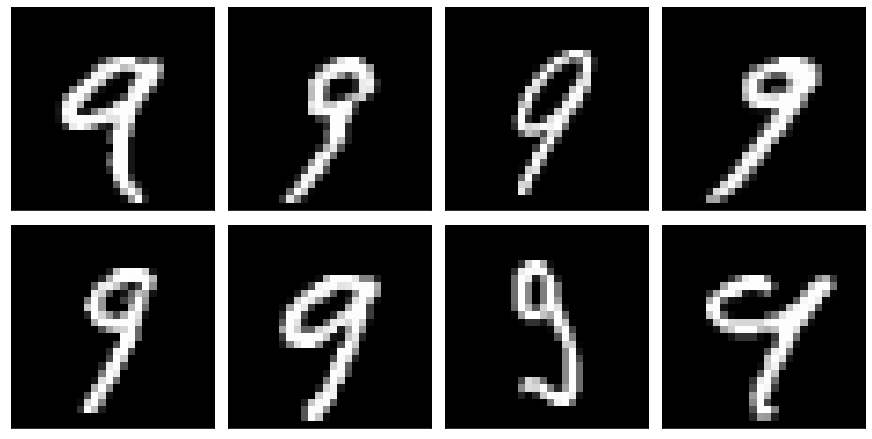

In [44]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [45]:
one_train   = np.ones(shape=(len(vector_x_train),1))
one_test    = np.ones(shape=(len(vector_x_test),1))

vector_x_train_bias = np.hstack([vector_x_train,one_train])
vector_x_test_bias  = np.hstack([vector_x_test,one_test])

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


In [46]:
def get_weight(dim_input, dim_output):
    
    weight = np.ones((dim_output,dim_input+1))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight = weight * 0.001
    weight[:,-1] = 1

    return weight

dim_input   = vector_x_train.shape[1]
dim_output  = nClass

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])
print(weight[:,-1])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

In [47]:
def layer_linear(input, weight):

    output = np.dot(input,weight.T)

    return output

In [48]:
layer_linear(vector_x_train_bias,weight)

array([[1.12194118, 1.12194118, 1.12194118, ..., 1.12194118, 1.12194118,
        1.12194118],
       [1.13895294, 1.13895294, 1.13895294, ..., 1.13895294, 1.13895294,
        1.13895294],
       [1.14316471, 1.14316471, 1.14316471, ..., 1.14316471, 1.14316471,
        1.14316471],
       ...,
       [1.1306    , 1.1306    , 1.1306    , ..., 1.1306    , 1.1306    ,
        1.1306    ],
       [1.16640784, 1.16640784, 1.16640784, ..., 1.16640784, 1.16640784,
        1.16640784],
       [1.07769804, 1.07769804, 1.07769804, ..., 1.07769804, 1.07769804,
        1.07769804]])

## Softmax function

In [49]:
def activation_softmax(input):

    input_exp = np.exp(input)
    partition = input_exp.sum(axis=1,keepdims=True)
    output    = input_exp / partition
    
    return output

## compute prediction by the forward propagation of the neural network

In [50]:
def compute_prediction(input, weight):

    output      = layer_linear(input,weight)
    prediction  = activation_softmax(output)

    return prediction

In [51]:
compute_prediction(vector_x_train_bias,weight).shape

(20000, 10)

## compute loss for the cross-entropy term

In [52]:
def compute_loss_cross_entropy(prediction, label):
    
    pred = np.log(prediction)
    loss = -(np.sum(np.sum(label*pred,axis=1)))/label.shape[0]
    return loss

## compute loss for the regularization term

In [53]:
def compute_loss_regularization(alpha, weight):
    
    L2_norm_square = np.linalg.norm(weight,ord=2) ** 2
    loss = L2_norm_square * alpha / 2

    return loss

In [54]:
compute_loss_regularization(0.1,weight)

0.5003920000000002

## compute loss function

In [55]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction,label) + compute_loss_regularization(alpha,weight)
    
    return loss

## compute gradient for the cross-entropy term

In [56]:
def compute_gradient_cross_entropy(input, prediction, label):
    
    gradient = np.dot((prediction-label).T,input)
    gradient = gradient / len(label)

    return gradient

## compute gradient for the regularization term

In [57]:
def compute_gradient_regularization(alpha, weight):
    
    gradient =  alpha * weight

    return gradient

In [58]:
compute_gradient_regularization(0.1,weight).shape

(10, 785)

## compute gradient

In [59]:
def compute_gradient(input, prediction, label, alpha, weight):

    gradient = compute_gradient_cross_entropy(input,prediction,label) + compute_gradient_regularization(alpha,weight)

    return gradient

## compute accuracy

In [60]:
def compute_accuracy(prediction, label):

    bCorrect    = [True if list(prediction[i]).index(max(prediction[i]))==list(label[i]).index(1) else False for i in range(len(label))]
    accuracy    = np.sum(bCorrect) / len(label)
    return accuracy

## consider bias in the data

In [61]:
one_train   = np.ones(shape=(len(vector_x_train),1))
one_test    = np.ones(shape=(len(vector_x_test),1))

vector_x_train_bias = np.hstack([vector_x_train,one_train])
vector_x_test_bias  = np.hstack([vector_x_test,one_test])

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [62]:
def get_weight(dim_input, dim_output):
    
    weight = np.ones((dim_output,dim_input))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight = weight * 0.001
    weight[:,-1] = 1

    return weight

In [63]:
dim_input   = vector_x_train_bias.shape[1]
dim_output  = nClass

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [64]:
number_iteration    = 100
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]
list_weight_decay   = [0.001, 0.01, 0.1]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [65]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [66]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [67]:
print(num_data_train)
t = np.random.permutation(num_data_train)[0:0+list_size_minibatch[1]]
print(vector_x_train_bias[t].shape)

20000
(100, 785)


In [68]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = len(vector_x_train_bias) // size_minibatch
    alpha           = 0
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(dim_input,nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch:(j+1)*size_minibatch]
            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data,weight)
            gradient    = compute_gradient(data,prediction,label,alpha,weight)
            weight      = weight  - learning_rate * gradient

            prediction  = compute_prediction(data,weight)
            loss        = compute_loss(prediction,label,alpha,weight)
            accuracy    = compute_accuracy(prediction,label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data,weight) 
        loss_test       = compute_loss(prediction,label,alpha,weight)
        accuracy_test   = compute_accuracy(prediction,label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size =  50, alpha = 0.000


  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.000


  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size = 200, alpha = 0.000


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [69]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = len(vector_x_train_bias) // size_minibatch
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(dim_input,nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch:(j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data,weight)
            gradient    = compute_gradient(data,prediction,label,alpha,weight)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data,weight)
            loss        = compute_loss(prediction,label,alpha,weight)
            accuracy    = compute_accuracy(prediction,label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data,weight) 
        loss_test       = compute_loss(prediction,label,alpha,weight)
        accuracy_test   = compute_accuracy(prediction,label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.001


  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.010


  0%|          | 0/100 [00:00<?, ?it/s]

mini-batch size = 100, alpha = 0.100


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


## plot curve

In [70]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [71]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [72]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [73]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [74]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

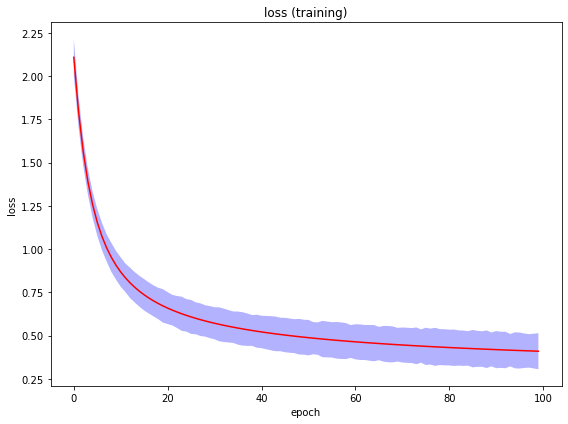

In [75]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

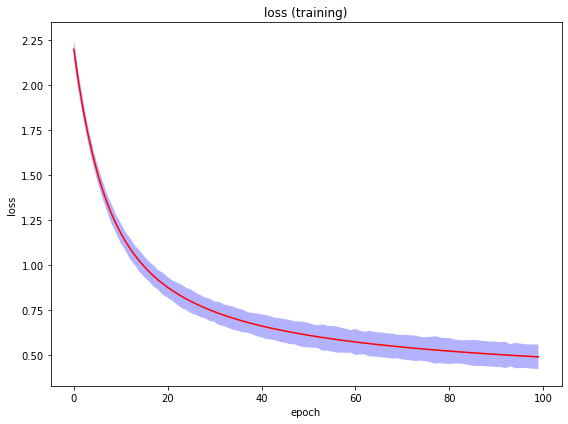

In [76]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

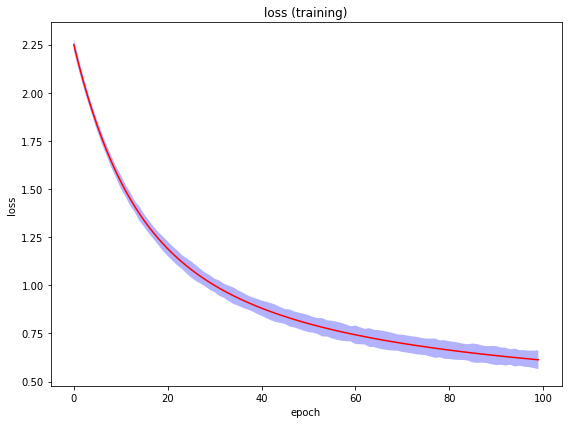

In [77]:

plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

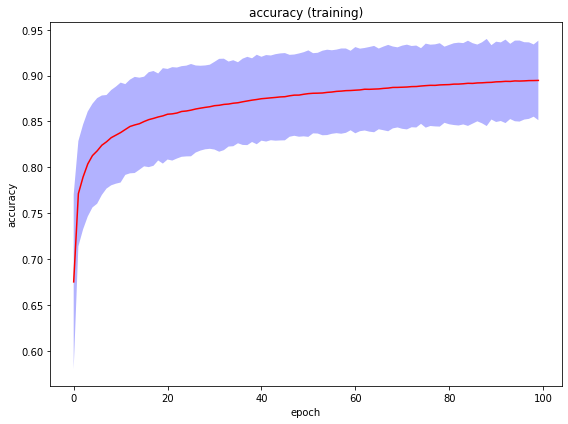

In [78]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

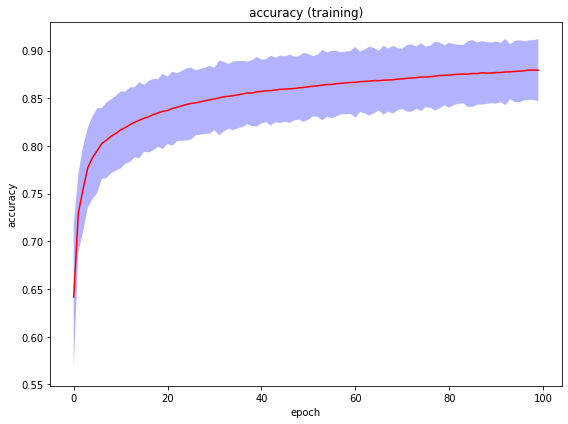

In [79]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

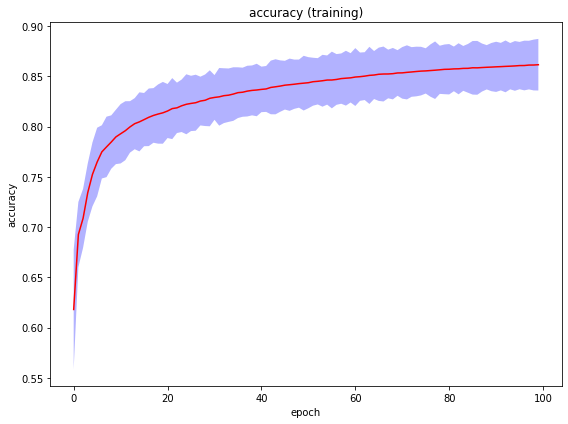

In [80]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

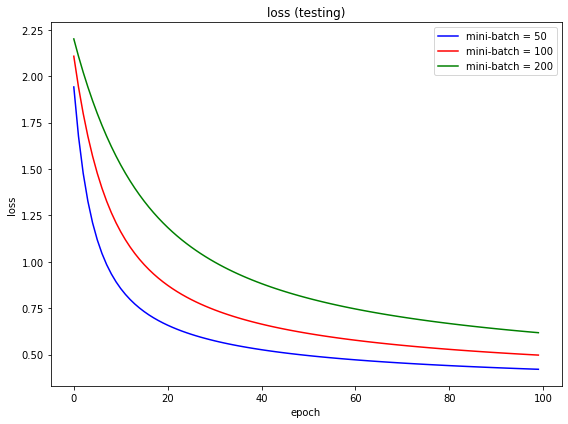

In [81]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

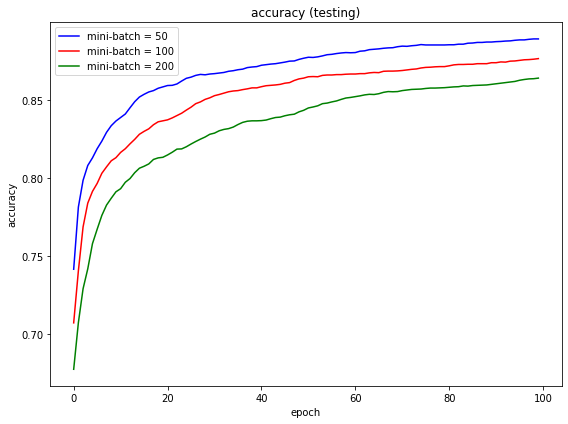

In [82]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

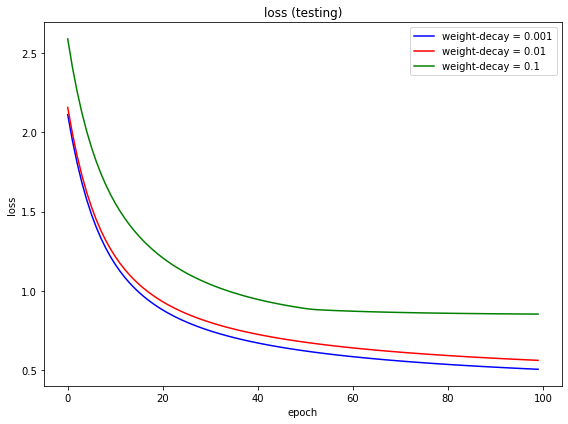

In [83]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

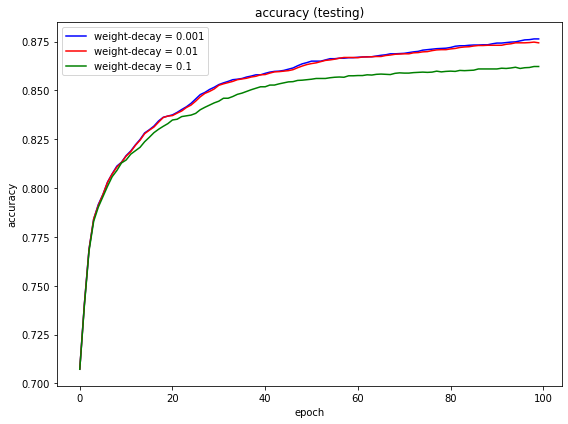

In [84]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [85]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [86]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [87]:
print_curve(train_loss_mean_minibatch[0], index)

index =    0, value = 2.1095174326


IndexError: index 100 is out of bounds for axis 0 with size 100

## training loss (mean) : mini-batch = 100, weight-decay = 0

In [ ]:
print_curve(train_loss_mean_minibatch[1], index)

index =    0, value = 2.2003866772
index =  100, value = 0.4884452279
index =  200, value = 0.4086303762
index =  300, value = 0.3743102039
index =  400, value = 0.3538169113
index =  500, value = 0.3396656612
index =  600, value = 0.3290494042
index =  700, value = 0.3206579243
index =  800, value = 0.3137801756
index =  900, value = 0.3079845796


## training loss (mean) : mini-batch = 200, weight-decay = 0

In [ ]:
print_curve(train_loss_mean_minibatch[2], index)

index =    0, value = 2.2496536286
index =  100, value = 0.6111343709
index =  200, value = 0.4888445621
index =  300, value = 0.4381704814
index =  400, value = 0.4087920721
index =  500, value = 0.3889821374
index =  600, value = 0.3744117757
index =  700, value = 0.3630728201
index =  800, value = 0.3538961488
index =  900, value = 0.3462466136


## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [ ]:
print_curve(train_accuracy_mean_minibatch[0], index)

index =    0, value = 0.6751000000
index =  100, value = 0.8951500000
index =  200, value = 0.9062000000
index =  300, value = 0.9112000000
index =  400, value = 0.9160000000
index =  500, value = 0.9184000000
index =  600, value = 0.9204000000
index =  700, value = 0.9224000000
index =  800, value = 0.9230000000
index =  900, value = 0.9238500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [ ]:
print_curve(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [ ]:
print_curve(train_accuracy_mean_minibatch[2], index)

index =    0, value = 0.6180500000
index =  100, value = 0.8617500000
index =  200, value = 0.8798500000
index =  300, value = 0.8886000000
index =  400, value = 0.8947000000
index =  500, value = 0.8989500000
index =  600, value = 0.9015500000
index =  700, value = 0.9039000000
index =  800, value = 0.9062000000
index =  900, value = 0.9078000000


## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [ ]:
print_curve(train_loss_mean_weight_decay[0], index)

index =    0, value = 2.2053959737
index =  100, value = 0.4962629800
index =  200, value = 0.4175434109
index =  300, value = 0.3840709465
index =  400, value = 0.3643988464
index =  500, value = 0.3514216500
index =  600, value = 0.3419763652
index =  700, value = 0.3346759415
index =  800, value = 0.3288218803
index =  900, value = 0.3239931453


## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [ ]:
print_curve(train_loss_mean_weight_decay[1], index)

index =    0, value = 2.2503892272
index =  100, value = 0.5527154423
index =  200, value = 0.4768299350
index =  300, value = 0.4555187148
index =  400, value = 0.4458227005
index =  500, value = 0.4405324514
index =  600, value = 0.4373688185
index =  700, value = 0.4353625905
index =  800, value = 0.4340460613
index =  900, value = 0.4331493839


## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [ ]:
print_curve(train_loss_mean_weight_decay[2], index)

index =    0, value = 2.6914887181
index =  100, value = 0.8456924353
index =  200, value = 0.8404500365
index =  300, value = 0.8401991509
index =  400, value = 0.8401929995
index =  500, value = 0.8402133683
index =  600, value = 0.8401931172
index =  700, value = 0.8401618275
index =  800, value = 0.8401630632
index =  900, value = 0.8402009377


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [ ]:
print_curve(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8794000000
index =  200, value = 0.8944000000
index =  300, value = 0.9014500000
index =  400, value = 0.9053000000
index =  500, value = 0.9083000000
index =  600, value = 0.9104000000
index =  700, value = 0.9124000000
index =  800, value = 0.9144500000
index =  900, value = 0.9157000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [ ]:
print_curve(train_accuracy_mean_weight_decay[1], index)

index =    0, value = 0.6414500000
index =  100, value = 0.8781500000
index =  200, value = 0.8913000000
index =  300, value = 0.8969500000
index =  400, value = 0.8999500000
index =  500, value = 0.9016500000
index =  600, value = 0.9028000000
index =  700, value = 0.9032000000
index =  800, value = 0.9034500000
index =  900, value = 0.9040000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [ ]:
print_curve(train_accuracy_mean_weight_decay[2], index)

index =    0, value = 0.6413000000
index =  100, value = 0.8620000000
index =  200, value = 0.8649000000
index =  300, value = 0.8649500000
index =  400, value = 0.8648000000
index =  500, value = 0.8650000000
index =  600, value = 0.8651500000
index =  700, value = 0.8648000000
index =  800, value = 0.8651500000
index =  900, value = 0.8653500000


## function definition for presenting the results

In [ ]:
def function_results_01(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[0][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

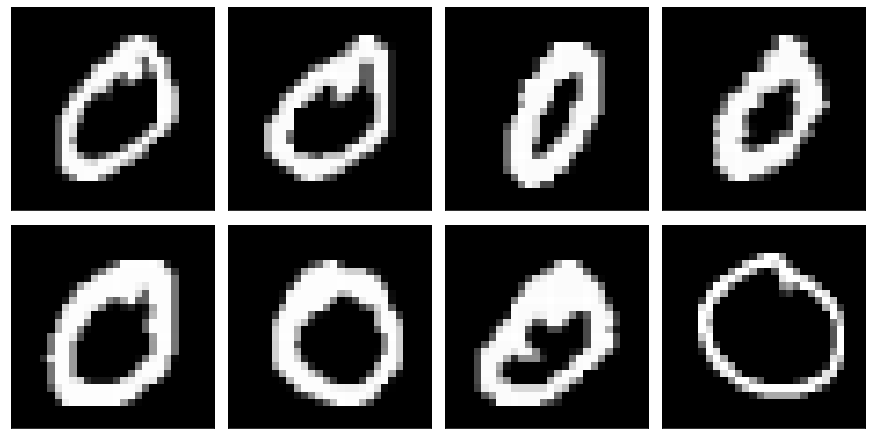

In [ ]:
function_results_01(x_train,2,4)

In [ ]:
def function_results_02(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[1][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

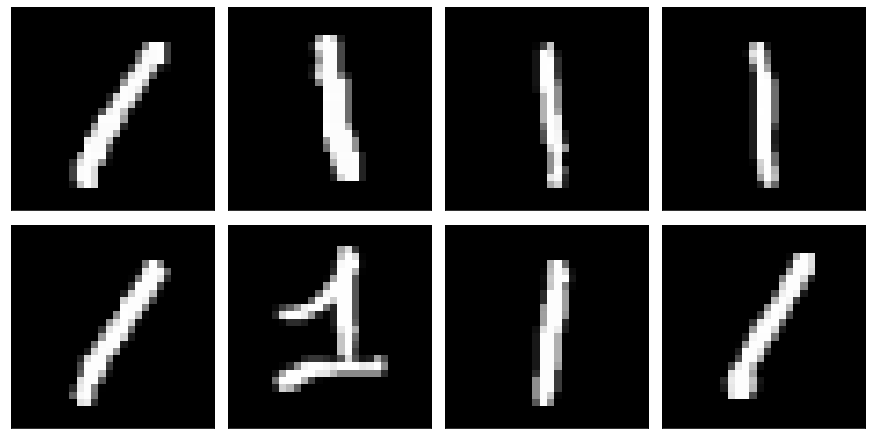

In [ ]:
function_results_02(x_train,2,4)

In [ ]:
def function_results_03(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[2][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

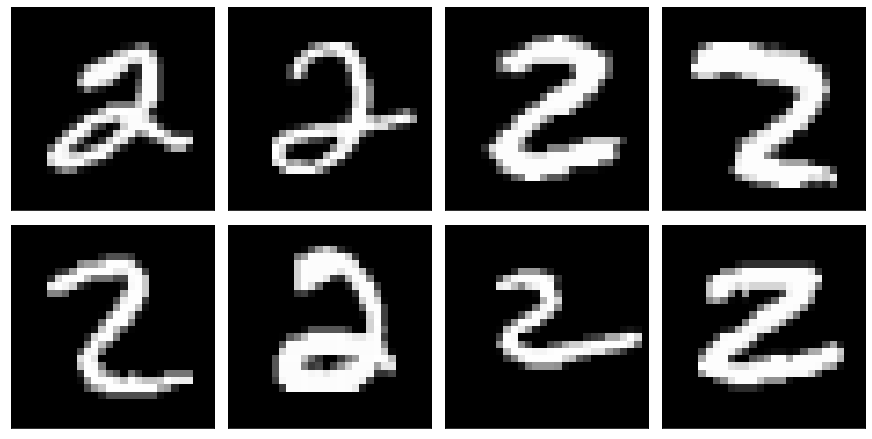

In [ ]:
function_results_03(x_train,2,4)

In [ ]:
def function_results_04(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[3][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

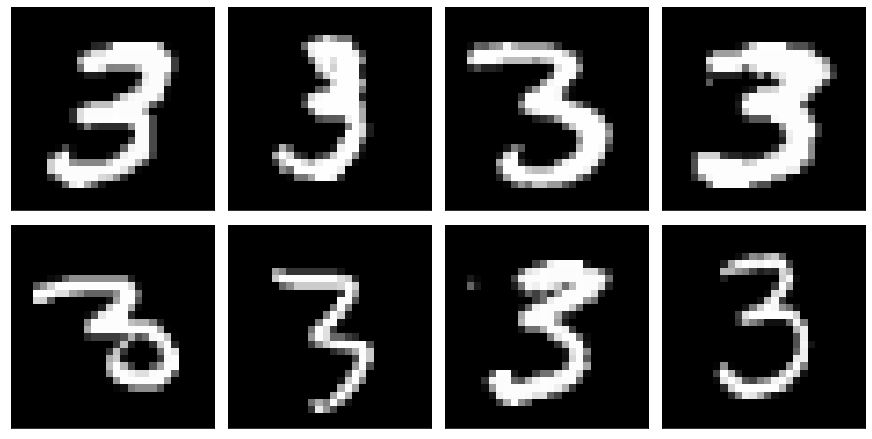

In [ ]:
function_results_04(x_train,2,4)

In [ ]:
def function_results_05(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[4][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

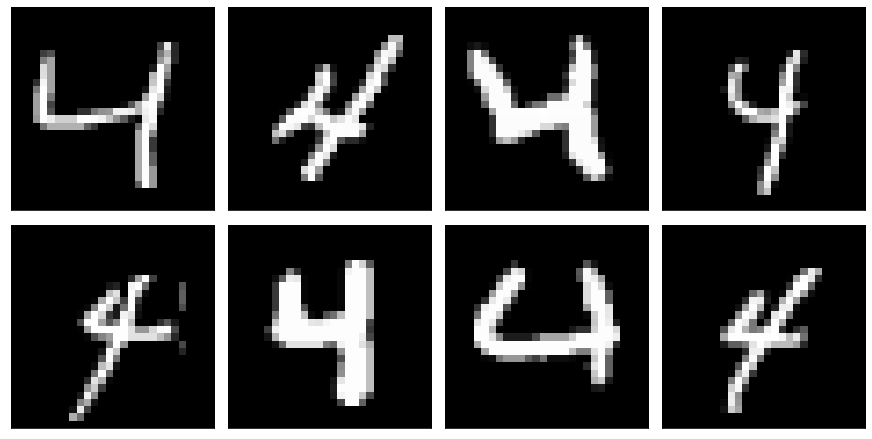

In [ ]:
function_results_05(x_train,2,4)

In [ ]:
def function_results_06(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[5][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

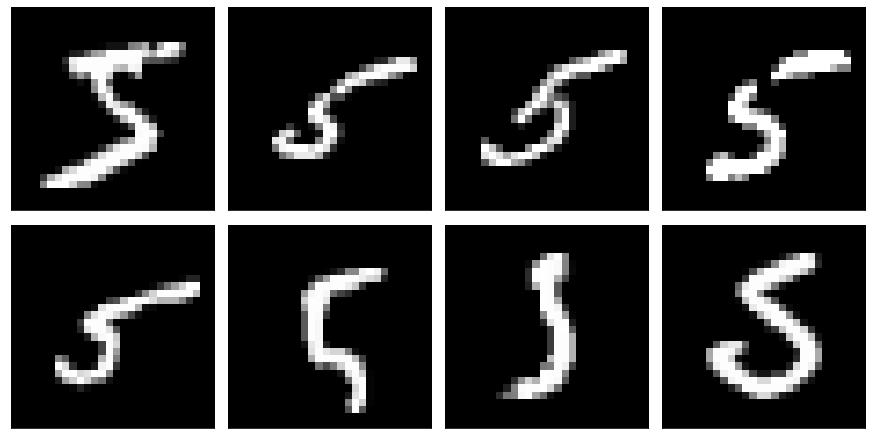

In [ ]:
function_results_06(x_train,2,4)

In [ ]:
def function_results_07(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[6][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

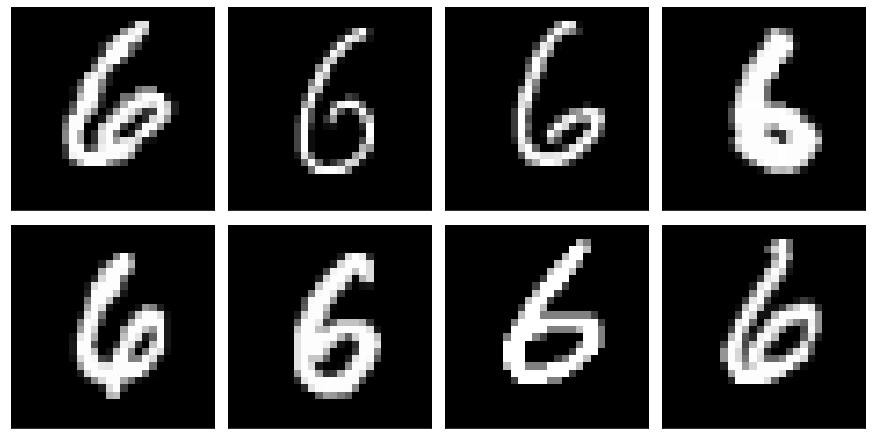

In [ ]:
function_results_07(x_train,2,4)

In [ ]:
def function_results_08(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[7][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

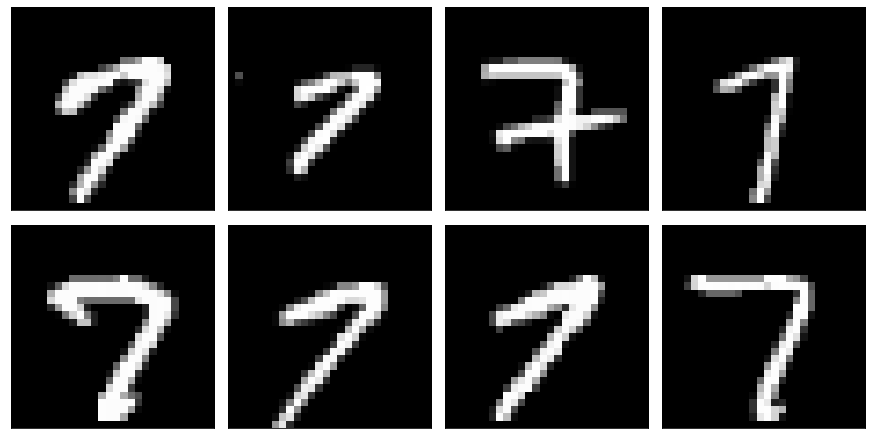

In [ ]:
function_results_08(x_train,2,4)

In [ ]:
def function_results_09(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[8][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

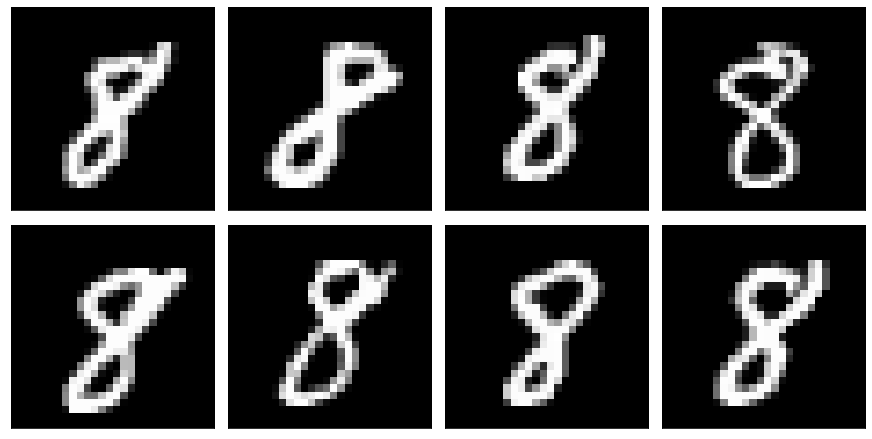

In [ ]:
function_results_09(x_train,2,4)

In [ ]:
def function_results_10(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[9][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

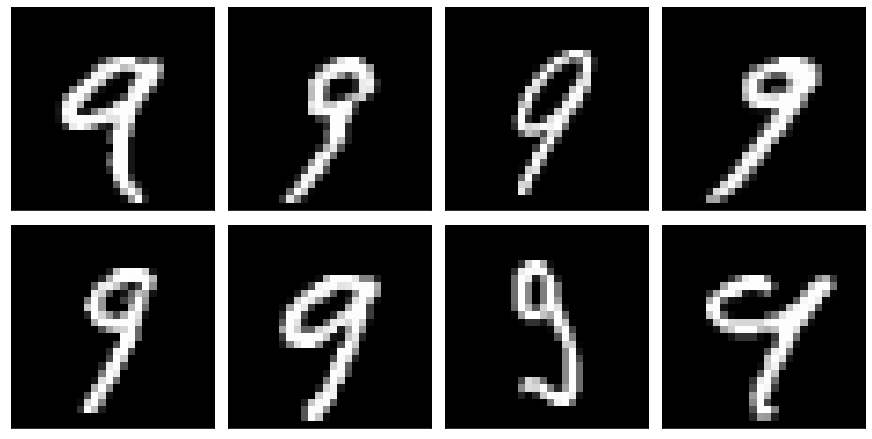

In [ ]:
function_results_10(x_train,2,4)

In [ ]:
def function_results_11():
    plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

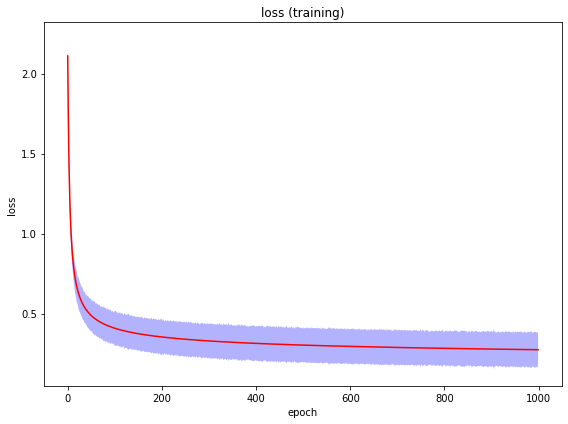

In [ ]:
function_results_11()

In [ ]:
def function_results_12():
    plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

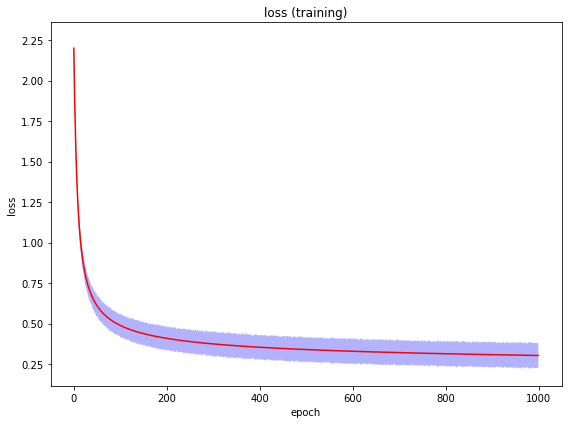

In [ ]:
function_results_12()

In [ ]:
def function_results_13():
    plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

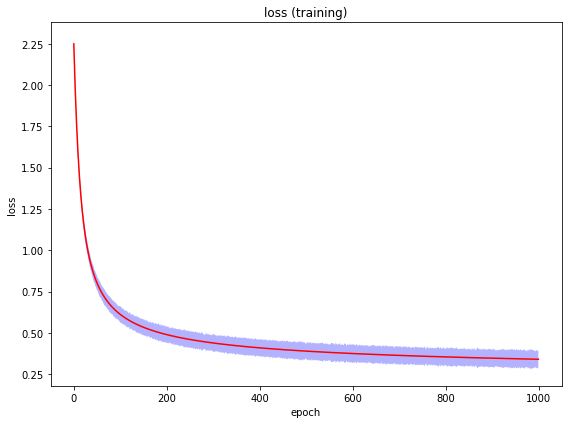

In [ ]:
function_results_13()

In [ ]:
def function_results_14():
    plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

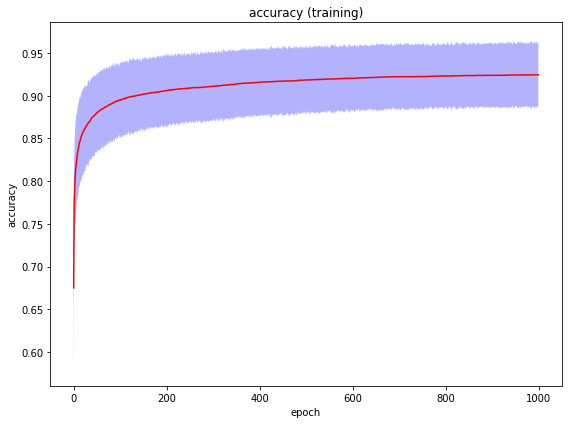

In [ ]:
function_results_14()

In [ ]:
def function_results_15():
    plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

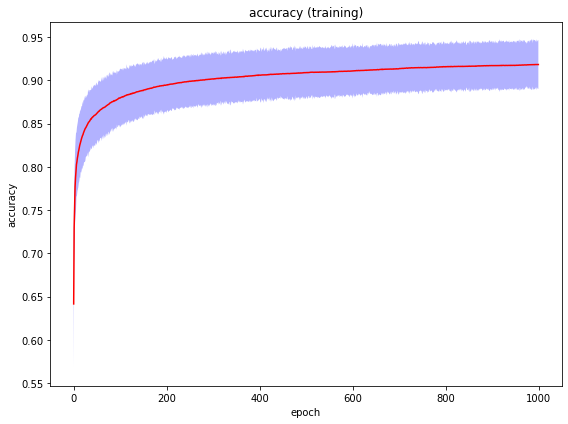

In [ ]:
function_results_15()

In [ ]:
def function_results_16():
    plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

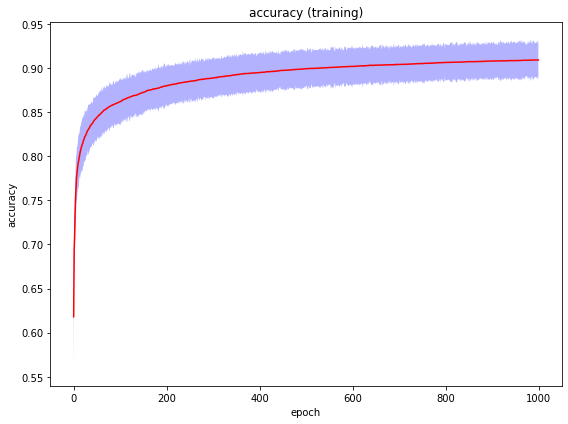

In [ ]:
function_results_16()

In [ ]:
def function_results_17():
    plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

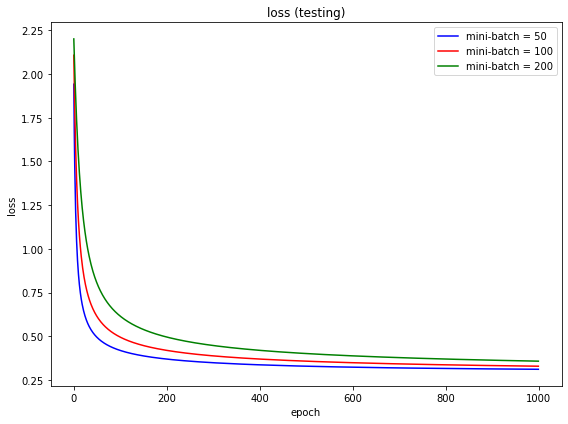

In [ ]:
function_results_17()

In [ ]:
def function_results_18():
    plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

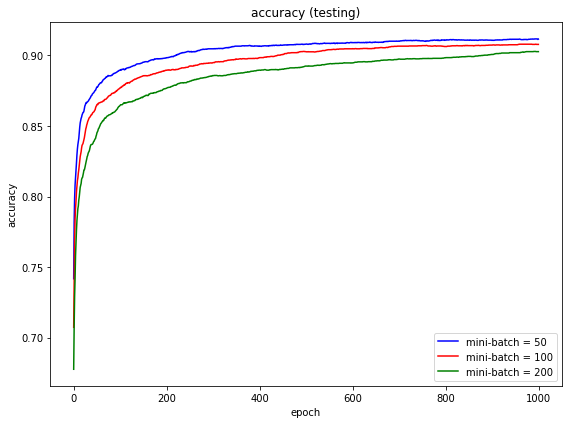

In [ ]:
function_results_18()

In [ ]:
def function_results_19():
    plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

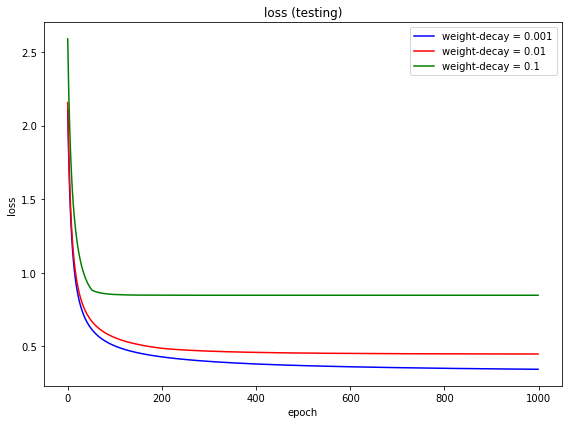

In [ ]:
function_results_19()

In [ ]:
def function_results_20():
    plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

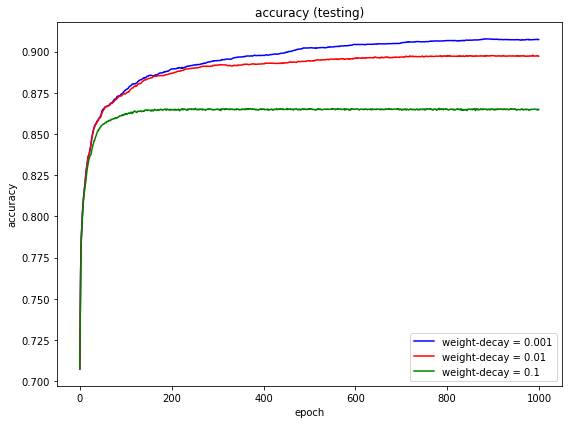

In [ ]:
function_results_20()

In [ ]:
def function_results_21(data):

    index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [ ]:
function_results_21(train_loss_mean_minibatch[1])

index =    0, value = 2.2003866772
index =  100, value = 0.4884452279
index =  200, value = 0.4086303762
index =  300, value = 0.3743102039
index =  400, value = 0.3538169113
index =  500, value = 0.3396656612
index =  600, value = 0.3290494042
index =  700, value = 0.3206579243
index =  800, value = 0.3137801756
index =  900, value = 0.3079845796


In [ ]:
def function_results_22(data):
    index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [ ]:
function_results_22(train_accuracy_mean_minibatch[1])

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


In [ ]:
def function_results_23(data):
    index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [ ]:
function_results_23(train_loss_mean_weight_decay[0])

index =    0, value = 2.2053959737
index =  100, value = 0.4962629800
index =  200, value = 0.4175434109
index =  300, value = 0.3840709465
index =  400, value = 0.3643988464
index =  500, value = 0.3514216500
index =  600, value = 0.3419763652
index =  700, value = 0.3346759415
index =  800, value = 0.3288218803
index =  900, value = 0.3239931453


In [ ]:
def function_results_24(data):
    index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [ ]:
function_results_24(train_accuracy_mean_weight_decay[0])

index =    0, value = 0.6415000000
index =  100, value = 0.8794000000
index =  200, value = 0.8944000000
index =  300, value = 0.9014500000
index =  400, value = 0.9053000000
index =  500, value = 0.9083000000
index =  600, value = 0.9104000000
index =  700, value = 0.9124000000
index =  800, value = 0.9144500000
index =  900, value = 0.9157000000


---

# RESULTS

---

## # 01. plot the input images for '0'

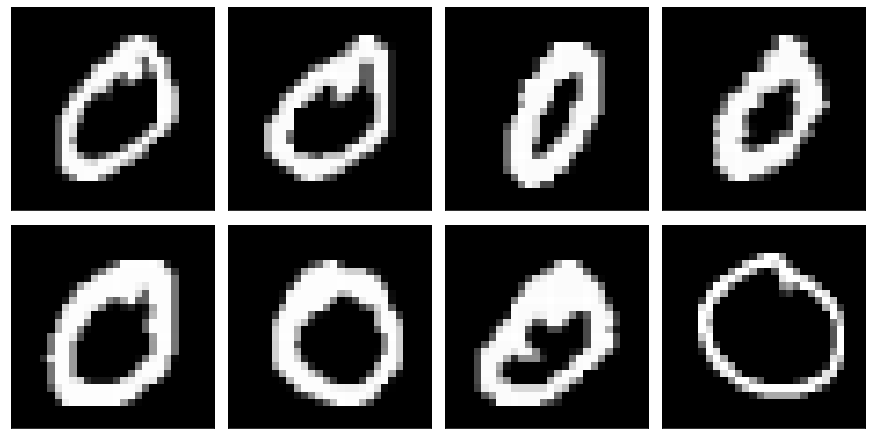

In [ ]:
function_results_01(x_train,2,4)

## # 02. plot the input images for '1'

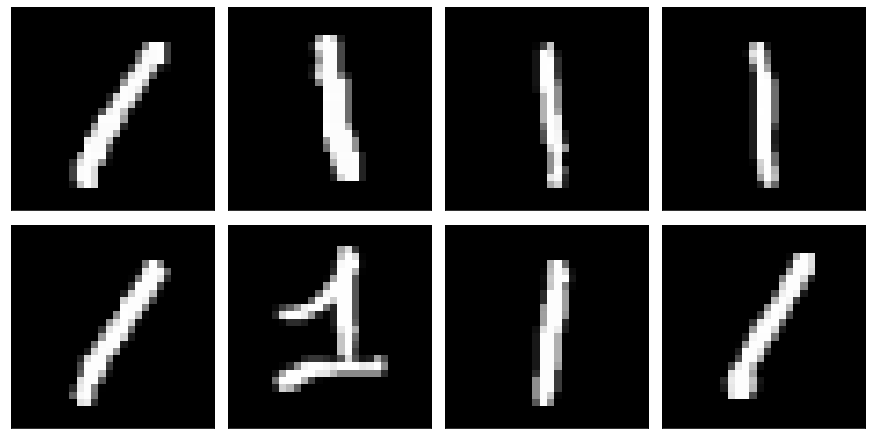

In [ ]:
function_results_02(x_train,2,4)

## # 03. plot the input images for '2'

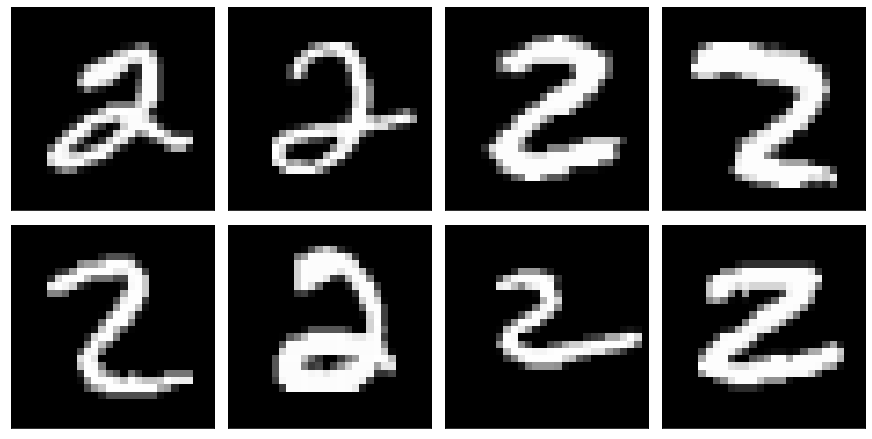

In [ ]:
function_results_03(x_train,2,4)

## # 04. plot the input images for '3'

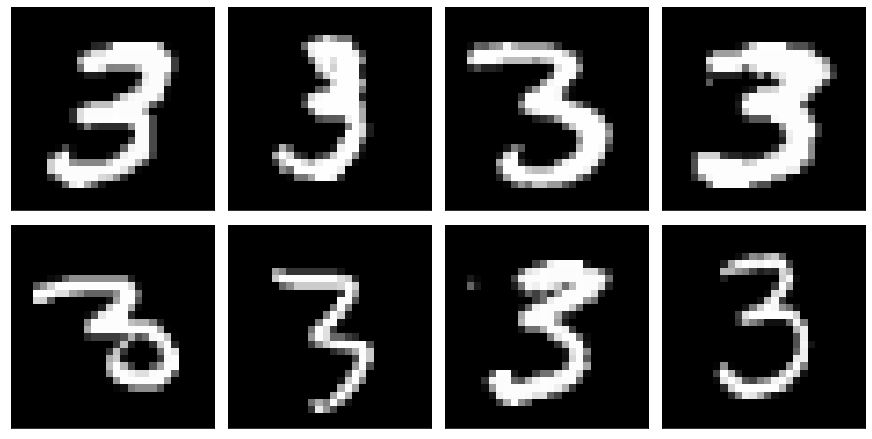

In [ ]:
function_results_04(x_train,2,4)

## # 05. plot the input images for '4'

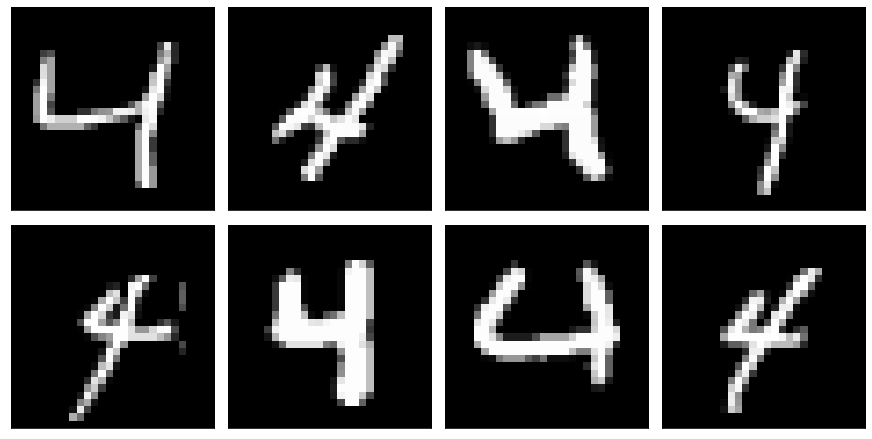

In [ ]:
function_results_05(x_train,2,4)

## # 06. plot the input images for '5'

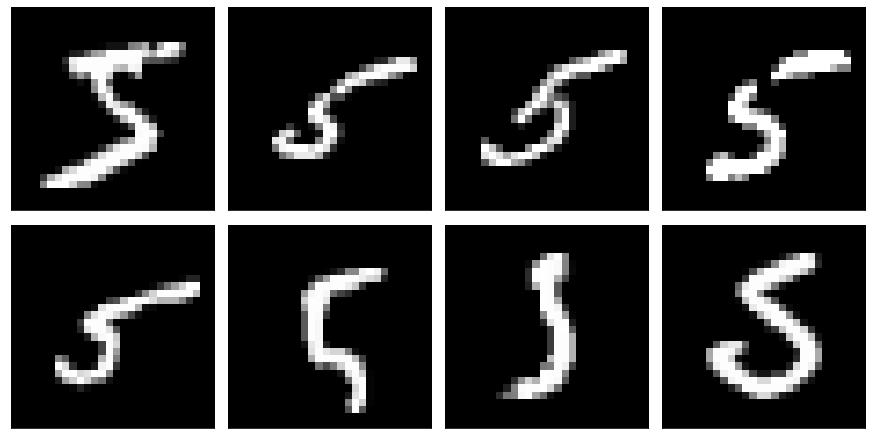

In [ ]:
function_results_06(x_train,2,4)

## # 07. plot the input images for '6'

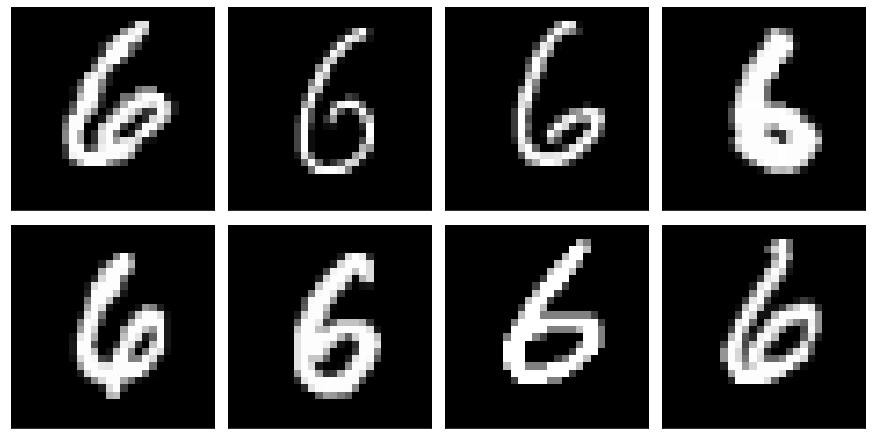

In [ ]:
function_results_07(x_train,2,4)

## # 08. plot the input images for '7'

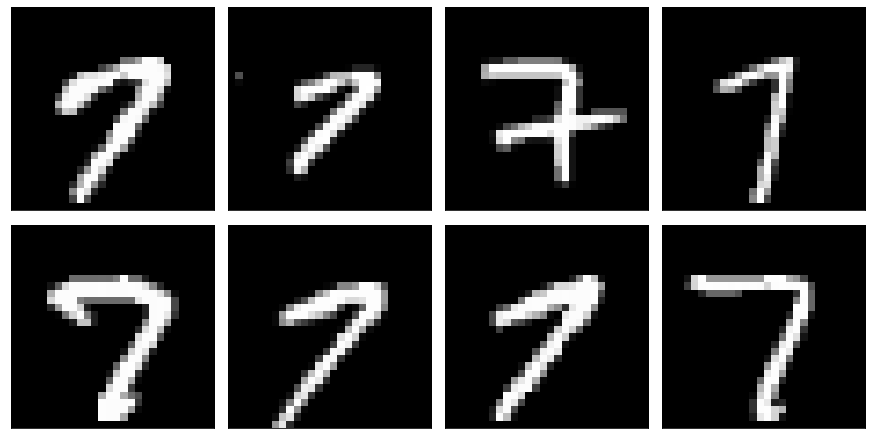

In [ ]:
function_results_08(x_train,2,4)

## # 09. plot the input images for '8'

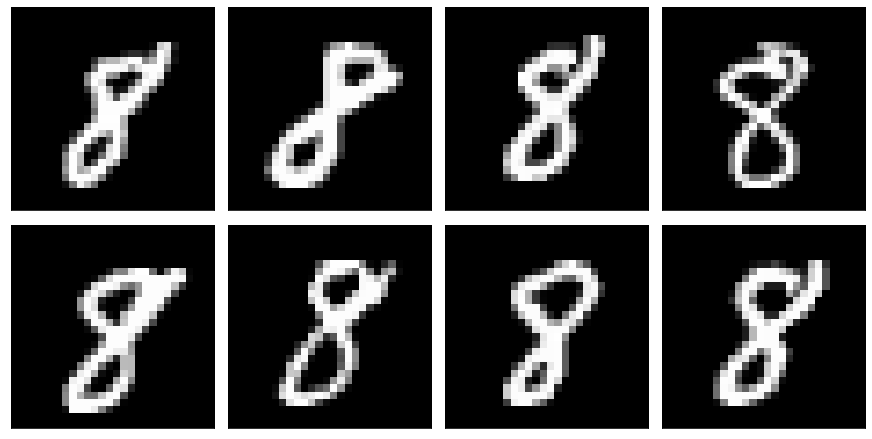

In [ ]:
function_results_09(x_train,2,4)

## # 10. plot the input images for '9'

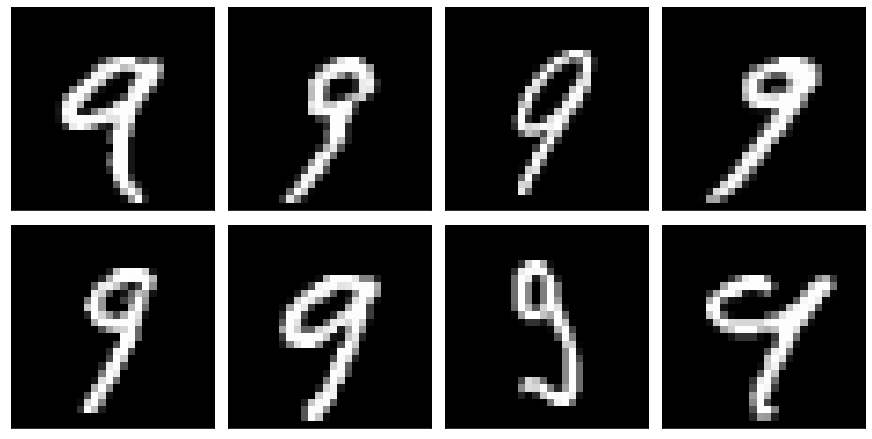

In [ ]:
function_results_10(x_train,2,4)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

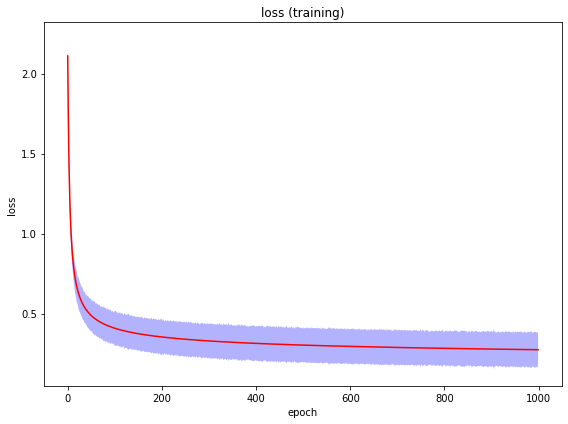

In [ ]:
function_results_11()

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

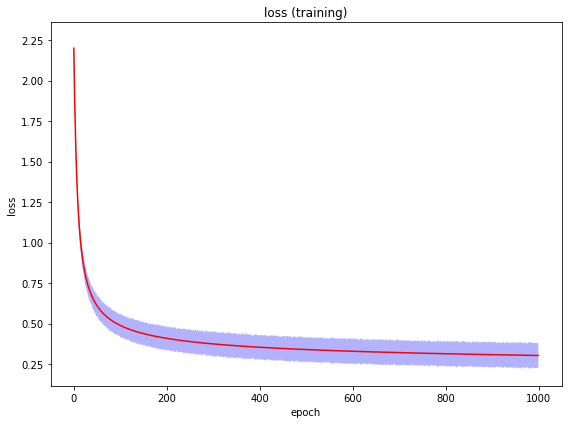

In [ ]:
function_results_12()

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

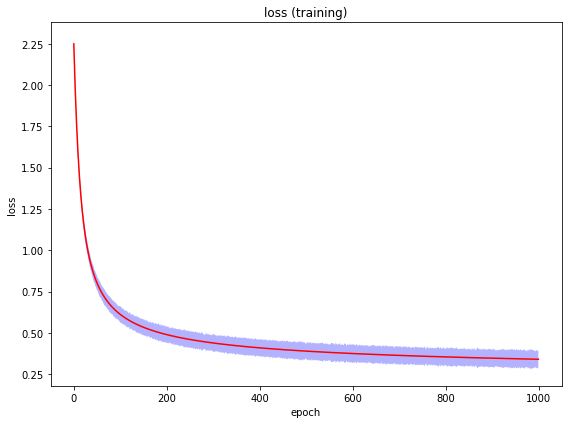

In [ ]:
function_results_13()

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

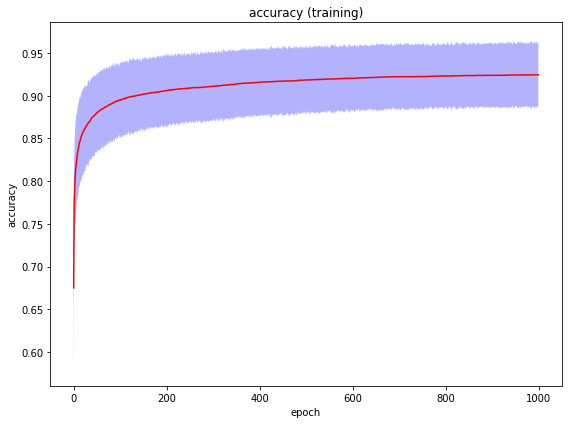

In [ ]:
function_results_14()

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

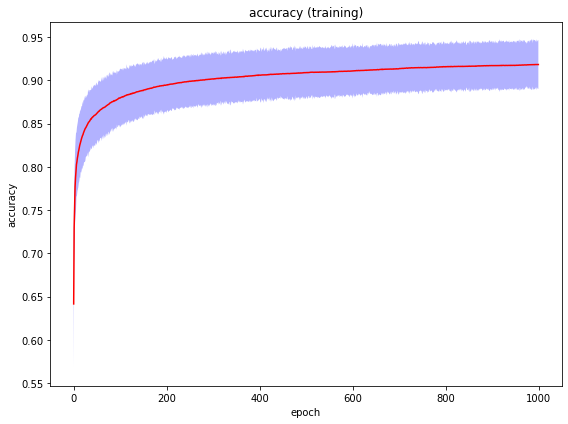

In [ ]:
function_results_15()

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

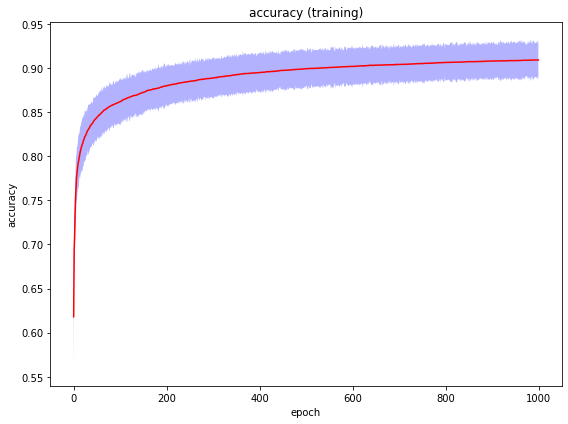

In [ ]:
function_results_16()

## # 17. plot loss (testing) curve (mean) with different mini-batch

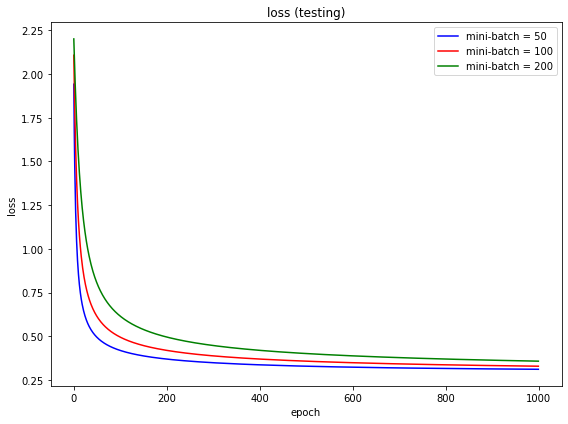

In [ ]:
function_results_17()

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

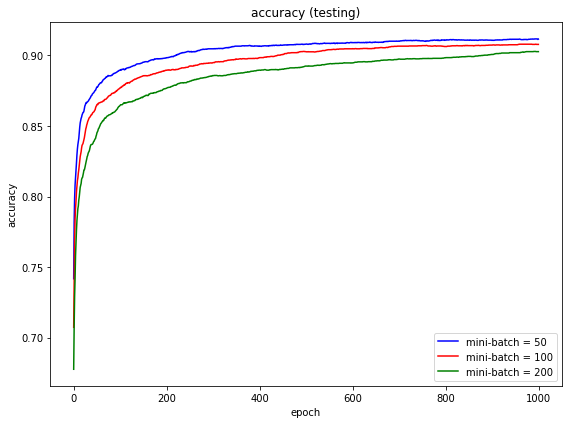

In [ ]:
function_results_18()

## # 19. plot loss (testing) curve (mean) with different weight-decay

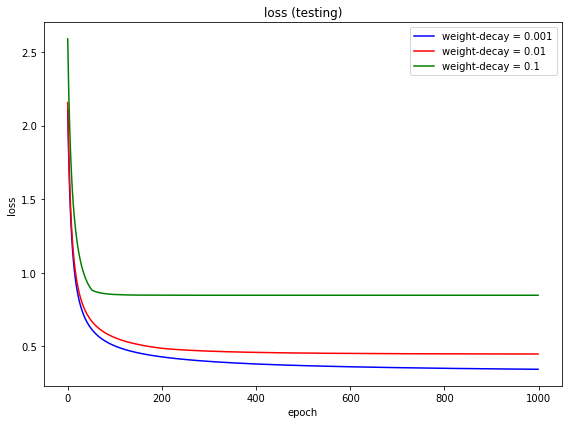

In [ ]:
function_results_19()

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

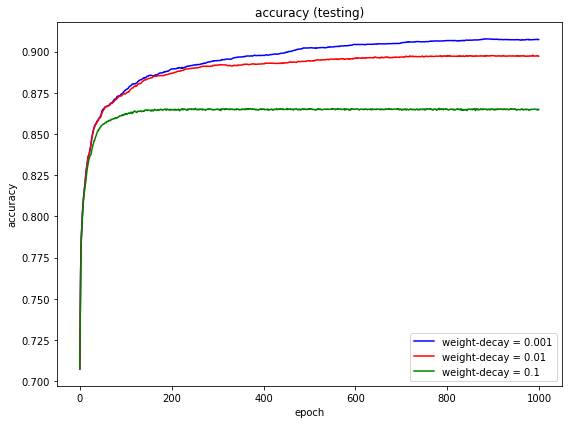

In [ ]:
function_results_20()

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_21(train_loss_mean_minibatch[1])

index =    0, value = 2.2003866772
index =  100, value = 0.4884452279
index =  200, value = 0.4086303762
index =  300, value = 0.3743102039
index =  400, value = 0.3538169113
index =  500, value = 0.3396656612
index =  600, value = 0.3290494042
index =  700, value = 0.3206579243
index =  800, value = 0.3137801756
index =  900, value = 0.3079845796


## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_22(train_accuracy_mean_minibatch[1])

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_23(train_loss_mean_weight_decay[0])

index =    0, value = 2.2053959737
index =  100, value = 0.4962629800
index =  200, value = 0.4175434109
index =  300, value = 0.3840709465
index =  400, value = 0.3643988464
index =  500, value = 0.3514216500
index =  600, value = 0.3419763652
index =  700, value = 0.3346759415
index =  800, value = 0.3288218803
index =  900, value = 0.3239931453


## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_24(train_accuracy_mean_weight_decay[0])

index =    0, value = 0.6415000000
index =  100, value = 0.8794000000
index =  200, value = 0.8944000000
index =  300, value = 0.9014500000
index =  400, value = 0.9053000000
index =  500, value = 0.9083000000
index =  600, value = 0.9104000000
index =  700, value = 0.9124000000
index =  800, value = 0.9144500000
index =  900, value = 0.9157000000
